In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [5]:
df = pd.read_csv('project_data/courses_no_ids/anonymized_bsc_data.csv')

C:\Users\pvanzand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,20,21,23,24,26,27,29,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,Sttr Term,course_#,course_title,Sttr Student Load,Sttr Stu Credits,Sttr Attempted Cred,Sttr Stu Final Grades,Sttr Cmpl Cred,Sttr Term Gpa,faculty,...,FA5 Enr,FA5 Class,FA5 Major,FA6 Enr,FA6 Class,FA6 Major,Graduated,Grad Term,Grad Year,Grad Major
0,15/SP,DA 101 A,Basic Ballet,F,0.5,3.0,W,3.0,3.667,Melissa Turnage,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
1,15/SP,HI 155 A-ES,Reforming America,F,1.0,NaN,A-,3.0,3.667,Victoria Ott,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
2,15/SP,PL 200 A-CI,Ethical Choice,F,1.0,NaN,B+,3.0,3.667,William Myers,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
3,15/SP,IDS 200 A-CI,Intro to Human Rights (GP),F,1.0,NaN,A,3.0,3.667,Sandra Sprayberry,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology
4,15/WI,GEN E299 49,Exploration Project,F,1.0,1.0,S,1.0,0.000,Vincent Gawronski,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,18/SP,1718.0,Psychology


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51537 entries, 0 to 51536
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sttr Term              51518 non-null  object 
 1   course_#               51518 non-null  object 
 2   course_title           51518 non-null  object 
 3   Sttr Student Load      51417 non-null  object 
 4   Sttr Stu Credits       51479 non-null  float64
 5   Sttr Attempted Cred    46383 non-null  float64
 6   Sttr Stu Final Grades  51518 non-null  object 
 7   Sttr Cmpl Cred         51417 non-null  float64
 8   Sttr Term Gpa          51417 non-null  float64
 9   faculty                51478 non-null  object 
 10  alt_id                 51518 non-null  float64
 11  Cohort                 51537 non-null  object 
 12  SP1 Enr                50912 non-null  object 
 13  SP1 Class              50912 non-null  float64
 14  SP1 Major              40420 non-null  object 
 15  FA

In [8]:
df.columns

Index(['Sttr Term', 'course_#', 'course_title', 'Sttr Student Load',
       'Sttr Stu Credits', 'Sttr Attempted Cred', 'Sttr Stu Final Grades',
       'Sttr Cmpl Cred', 'Sttr Term Gpa', 'faculty', 'alt_id', 'Cohort',
       'SP1 Enr', 'SP1 Class', 'SP1 Major', 'FA2 Enr', 'FA2 Class',
       'FA2 Major', 'FA3 Enr', 'FA3 Class', 'FA3 Major', 'FA4 Enr',
       'FA4 Class', 'FA4 Major', 'FA5 Enr', 'FA5 Class', 'FA5 Major',
       'FA6 Enr', 'FA6 Class', 'FA6 Major', 'Graduated', 'Grad Term',
       'Grad Year', 'Grad Major'],
      dtype='object')

In [13]:
grade_compare = df.groupby(['Cohort', 'Graduated'])['Sttr Term Gpa'].mean()
grade_compare

Cohort  Graduated
14/FA   N            2.376726
        Y            3.187866
15/FA   N            2.605404
        Y            3.164591
16/FA   N            2.725342
        Y            3.262038
17/FA   N            2.503164
        Y            3.418876
Name: Sttr Term Gpa, dtype: float64

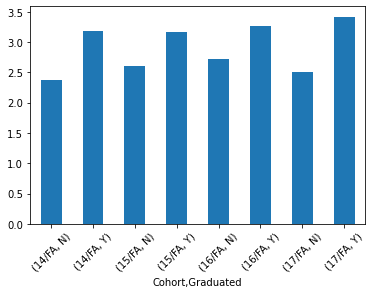

In [17]:
# plot multiple groupby (cohort and graduated)
grade_compare.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [19]:
degree_compare = df.groupby(['Grad Major'])['Grad Year'].count()
degree_compare

Grad Major
Accounting                             1877
Applied Computer Science                342
Applied Computer Sciencee                65
Architectural Studies                    78
Art - Studio                            837
Art History                              38
Art-Art History                         206
Asian Studies                           199
Biology                                4131
Business Administration                6049
Chemistry                              1150
Creative & Applied Computing            130
Economics                               494
Elem/Collaborative Education           1146
English                                 760
Global and Comparative Studies          284
Health Sciences                        1370
History                                1509
Ind - Film & Theatre                     42
Ind - Graphic Marketing                  34
Ind - Human Rights & Conf Stud           40
Ind - Human Rights & Justice             38
Ind-Education        